## Confidence Intervals - Lab

### Introduction

In this lab, we'll explore how to build confidence intervals! We'll do this by using the sampling distribution of the mean and the Central Limit Theorem to prove that the sample mean is normally distributed. We'll then use this information to calculate confidence intervals for the mean.

**Reminder**: The confidence interval for the mean is defined as:

$$ CI = \bar{x} \pm z^* \frac{\sigma}{\sqrt{n}} $$

Where $\bar{x}$ is the sample mean, $\sigma$ is the population standard deviation, and $z^*$ is the z-score on the standard normal distribution corresponding to our desired confidence level.

### Data 

We will use call center data to explore the Central Limit Theorem.  The data set contains information on 4,999 calls.  We will focus on the Intervals column, which contains the number of seconds between when a call is placed and when it is answered.  We will treat this as the population, and we will draw samples from it to see the Central Limit Theorem in action.

### Objectives

You will be able to:

* Demonstrate practical understanding of the Central Limit Theorem  
* Visually demonstrate the Central Limit Theorem using Python

### 1. Import the necessary libraries and load the data.


## 1. Visualizing the CLT

Let's start by visualizing the Central Limit Theorem using a dataset.  Recall that the Central Limit Theorem states the following:

> Given a dataset with a known mean and standard deviation, if we take random samples from the dataset (of size $n$), then when $n$ is sufficiently large, the distribution of the sample means will be normally distributed.  This distribution will have a mean of $\mu$ and a standard deviation of $\frac{\sigma}{\sqrt{n}}$.

Let's investigate the Central Limit Theorem by analyzing the distribution of sample means for a real dataset!  We'll be using the call center dataset.


In [2]:
import pandas as pd

call_center_df= pd.read_csv("data/call_center_small.csv")
call_center_df.head()

,datetime,interval
0,2021-01-01 09:12:58,0.0
1,2021-01-01 09:47:31,2073.0
2,2021-01-01 09:47:31,0.0
3,2021-01-01 10:00:29,778.0
4,2021-01-01 10:00:29,0.0


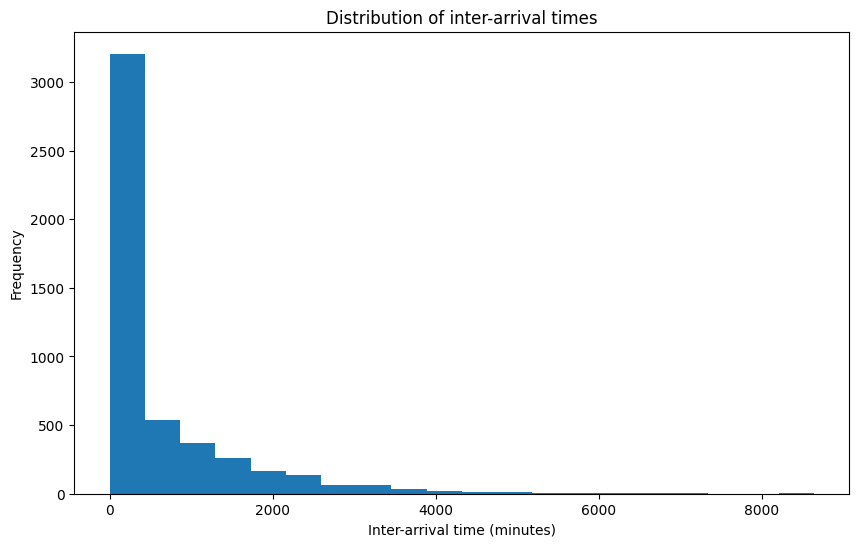

In [3]:
import matplotlib.pyplot as plt
# plot the distribution of the inter-arrival times
plt.figure(figsize=(10, 6))
plt.hist(call_center_df[call_center_df["interval"] < 20000]["interval"], bins= 20)
plt.xlabel("Inter-arrival time (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of inter-arrival times")
plt.show()


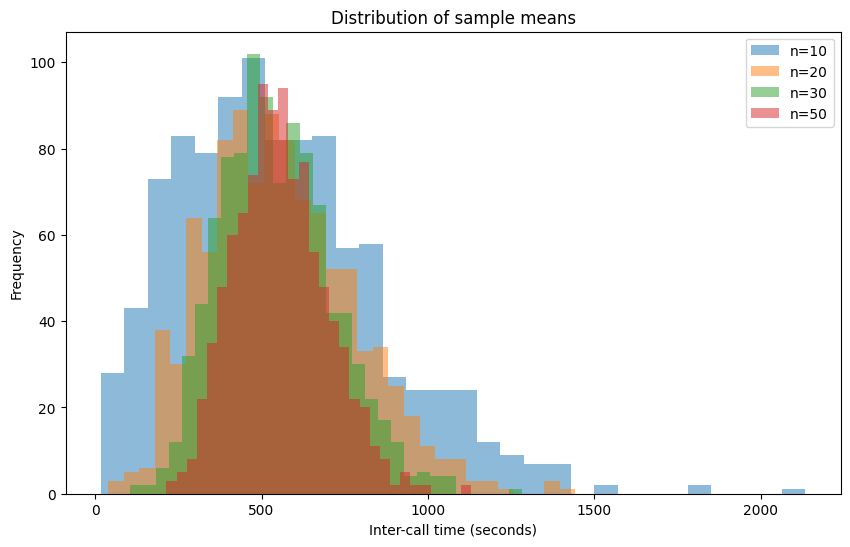

In [4]:
# generate random samples of sample sizes 10, 20, 30 and 50 of interval from the data set
# calulate the mean of each sample
# plot the distribution of the sample means for each data set

sample_sizes= [10, 20, 30, 50]
sample_means= {}

for sample_size in sample_sizes:
    sample_means[sample_size] = []
    for i in range(1000):
        sample_means[sample_size].append(call_center_df["interval"].sample(sample_size).mean())

plt.figure(figsize=(10, 6))
for sample_size in sample_sizes:
    plt.hist(sample_means[sample_size], bins= 30, alpha=0.5, label= f"n={sample_size}")
plt.xlabel("Inter-call time (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of sample means")
plt.legend()
plt.show()

## Exercises

**Reminders**: 

> Given a dataset with a known mean and standard deviation, if we take random samples from the dataset (of size $n$), then when $n$ is sufficiently large, the distribution of the sample means will be normally distributed.  This distribution will have a mean of $\mu$ and a standard deviation of $\frac{\sigma}{\sqrt{n}}$.

> Intervals between calls follow an exponential distribution of mean $\frac{1}{\lambda}$, where $\lambda$ is the average number of calls per second.  *e.g.* If he average number of calls per second is 2.5, so the average interval between calls is $\frac{1}{2.5} = 0.4$ seconds.

### 1. Z inrervals

Calculate the average interval for samples of size 50 from the data set. Using this information, calculate the 95% confidence interval around the mean for the population.

**Hint 1**: Remember, the formula for the confidence interval is:

$$ CI = \bar{x} \pm z^* \frac{\sigma}{\sqrt{n}} $$

Where $\bar{x}$ is the sample mean, $\sigma$ is the population standard deviation, and $z^*$ is the z-score on the standard normal distribution corresponding to our desired confidence level. In python: 
    
```python
import scipy.stats as stats
z = stats.norm.ppf(q = 0.975)  # Get the z-critical value*
```

**Hint 2**: You can calculate the population standard deviation from the population mean in python using the following code:

```python
import numpy as np
population_std = np.std(population)
population_mean= np.mean(population)
```

**Hint 3**: You can calculate the square root of a number in python using the following code:

```python
import numpy as np
np.sqrt(25)

```


In [5]:
sample_size= 50
sample_means= [] # after the loop, this list will contain 1000 sample means

for i in range(1000):
    my_sample= call_center_df["interval"].sample(sample_size)
    my_sample_mean= my_sample.mean()
    sample_means.append(my_sample_mean)

# your code here

### 2. T intervals

Calculate the means for samples of size 10 from the data set. Using this information, calculate the 95% confidence interval around the mean for the population, taking into account the fact that your sample size is small.

**Hint**: Remember, the formula for the confidence interval is:

$$ CI = \bar{x} \pm t^* \frac{s}{\sqrt{n}} $$

Where $\bar{x}$ is the sample mean, $s$ is the sample standard deviation, and $t^*$ is the t-score on the t-distribution corresponding to our desired confidence level and sample size minus 1 degrees of freedom. In python: 
    
```python
import scipy.stats as stats
sample_size = len(sample)
t = stats.t.ppf(q = 0.975, df= sample_size - 1)  # Get the t-critical value*
```

In [ ]:
# your code here

## The Dehli temperature data set.

We will now look at the temperature data set from Dehli.

First we must read the data set, and we will look at the first 5 rows.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
filename= "data/Delhi_NCR_1990_2022_Safdarjung_seasons.csv"
dehli_df= pd.read_csv(filename)

dehli_df.head()
dehli_df["date"]= dehli_df["time"].apply(lambda x: datetime.strptime(x, "%d-%m-%Y"))
dehli_df.head()



,time,tavg,tmin,tmax,prcp,season,date
0,01-01-1990,9.4,6.0,15.1,0.0,winter,1990-01-01
1,02-01-1990,9.3,5.2,14.2,0.0,winter,1990-01-02
2,03-01-1990,9.0,6.5,13.6,0.0,winter,1990-01-03
3,04-01-1990,10.7,6.0,17.5,0.0,winter,1990-01-04
4,05-01-1990,12.6,7.3,20.8,0.0,winter,1990-01-05


### Average temperature by Season

Let's look at the distribution of the average temperature for Winter and Summer in Dehli.

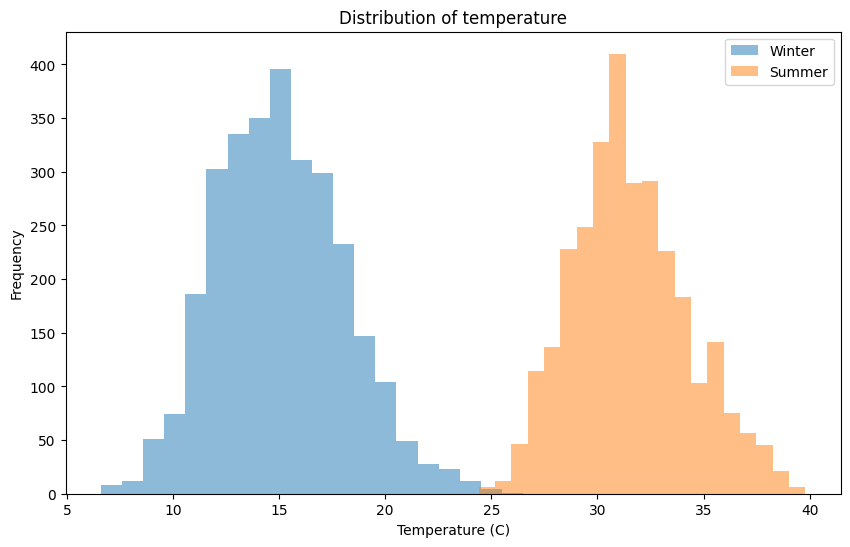

In [7]:
# plot distribution of temperature for winter and summer

plt.figure(figsize=(10, 6))
plt.hist(dehli_df[dehli_df["season"] == "winter"]["tavg"], bins= 20, alpha=0.5, label= "Winter")
plt.hist(dehli_df[dehli_df["season"] == "summer"]["tavg"], bins= 20, alpha=0.5, label= "Summer")
plt.xlabel("Temperature (C)")
plt.ylabel("Frequency")
plt.title("Distribution of temperature")
plt.legend()


## Exercises

### Exercise 1.

Using samples of size 50, construct a 95% confidence interval for the **mean** temperature over the summer months in Dehli. 

**Hint 1** notice the use of the `sample` method and the `np.mean` methods in the code below.
**Hint 2** 



In [11]:
## prepare your data for sampling, and your sampling parameters

summer_df= dehli_df[dehli_df["season"] == "summer"]
column_of_interest= "tavg"
sample_size= 50

sample_means= [] # after the loop, this list will contain 1000 sample means

for i in range(1000):
    my_sample= summer_df[column_of_interest].sample(sample_size)
    my_sample_mean= my_sample.mean()
    sample_means.append(my_sample_mean)


# your code here

### Exercise 2.

Using samples of size 50, construct a 95% confidence interval for the **maximum** temperature over the winter months in Dehli.



In [10]:
winter_df= dehli_df[dehli_df["season"] == "winter"]

# your code here